# **⭐⭐ Classification Model to Identify Employee Attrition**

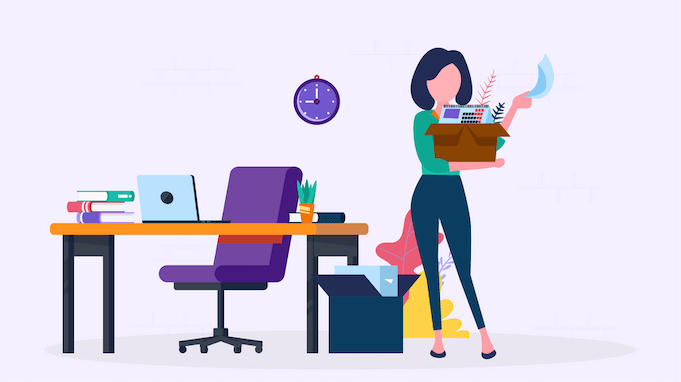

Description of variables

1. AGE :	Numerical Value
2. ATTRITION :	Employee leaving the company (0=no, 1=yes)
3. BUSINESS TRAVEL	: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
4. DAILY RATE	: Numerical Value - Salary Level
5. DEPARTMENT : 	(1=HR, 2=R&D, 3=Sales)
6. DISTANCE FROM HOME :	Numerical Value - THE DISTANCE FROM WORK TO HOME
7. EDUCATION	Numerical Value
8. EDUCATION FIELD	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
9. EMPLOYEE COUNT	Numerical Value
10. EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID
11. ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT
12. GENDER	(1=FEMALE, 2=MALE)
13. HOURLY RATE	Numerical Value - HOURLY SALARY
14. JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT
15. JOB LEVEL	Numerical Value - LEVEL OF JOB
16. JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
17. JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB
18. MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
19. MONTHLY INCOME	Numerical Value - MONTHLY SALARY
20. MONTHY RATE	Numerical Value - MONTHY RATE
21. NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT
22. OVER 18	(1=YES, 2=NO)
23. OVERTIME	(1=NO, 2=YES)
24. PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY
25. PERFORMANCE RATING	Numerical Value - PERFORMANCE RATING
26. RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION
27. STANDARD HOURS	Numerical Value - STANDARD HOURS
28. STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS
29. TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED
30. TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING
31. WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
32. YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
33. YEARS IN CURRENT ROLE	Numerical Value -YEARS IN 34. CURRENT ROLE
34. YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION
35. YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [37]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/EmployeeAttrition.csv')

In [3]:
# view data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# check for missing value
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# check for categories
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# visualize pairplot
sns.pairplot(data=df)

In [12]:
# columns name
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
# column names of numerical columns
df.columns[df.columns.dtype == 'object']

array([['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField',
        'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
        'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
        'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
        'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager']], dtype=object)

In [30]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


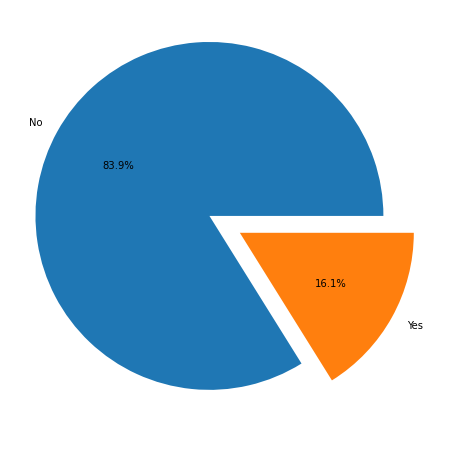

In [33]:
plt.figure(figsize=(8,8))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [34]:
df.select_dtypes(include=['int64']).dtypes


Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [35]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
X = df.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # Features
y = df['Attrition'] # Target

In [38]:
# Label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [39]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [40]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [41]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 31)
(1176, 31)
(294, 31)


In [44]:
# train model
cf_reports = []
models = []
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

Testing model: Random Forest
Cross_Val Mean: 0.7999203526840607, Training Accuracy: 1.0, Testing Accuracy: 0.8401360544217688

Testing model: Logistic Regression
Cross_Val Mean: 0.8219775205615518, Training Accuracy: 0.8656462585034014, Testing Accuracy: 0.8571428571428571

Testing model: SVM
Cross_Val Mean: 0.7660141990060427, Training Accuracy: 0.8392857142857143, Testing Accuracy: 0.8367346938775511



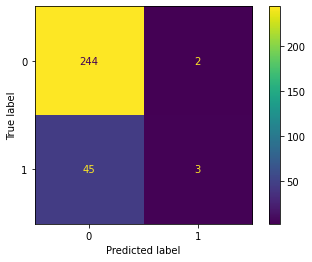

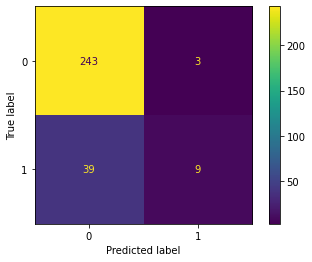

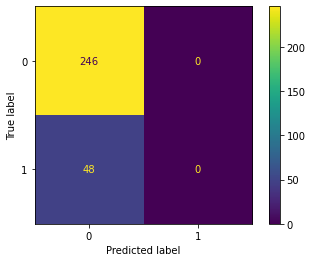

In [46]:
# predict with model
# model accuracy
# model confusion matrix


n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_train,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")
    
    plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_)

In [59]:
# Finalizing the model.
# train model
Rf = RandomForestClassifier()
model = Rf.fit(X_train, y_train)

In [61]:
# model classification report
y_pred_test = Rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       246
           1       0.75      0.12      0.21        48

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.57       294
weighted avg       0.84      0.85      0.80       294



In [62]:
# future prediction
df.iloc[[1052]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,0,Non-Travel,990,Research & Development,7,3,Technical Degree,1,1482,...,2,80,2,1,2,2,1,0,0,0


In [75]:
# define X_new
df[df.columns.drop('Attrition')].iloc[[1052]]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,Non-Travel,990,Research & Development,7,3,Technical Degree,1,1482,3,...,2,80,2,1,2,2,1,0,0,0


In [85]:
# predict for X_new
Rf.predict([X_test[100]])

array([0], dtype=int64)